In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
#!kaggle competitions download -c company-bankruptcy-prediction

 81% 17.0M/21.0M [00:00<00:00, 52.4MB/s]
100% 21.0M/21.0M [00:00<00:00, 59.4MB/s]


In [6]:
!ls

corr.csv      hel.csv	  kaggle.json		 test.csv
diamonds.csv  hello.jpeg  sample_submission.csv  train.csv


In [7]:
pd.set_option('display.max_columns', None)

NameError: ignored

In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

Archive:  company-bankruptcy-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [9]:
dfs=pd.read_csv("train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,6,7,8,10,11,12,15,16,19,23,26,30,36,37,39,49,52,56,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 67 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   id                                                                                                                                  25121 non-null  int64 
 1   forecasting period                                                                                                                  25121 non-null  int64 
 2   net_profit_over_total_assets                                                                                                        25121 non-null  object
 3   total_liabilities_over_total_assets                                                   

In [11]:
dfs.isna().sum().sort_values(ascending=True)

id                                                                 0
operating_expenses_over_total_liabilities                          0
profit_on_sales_over_total_assets                                  0
total_sales_over_total_assets                                      0
current_assets_minus_inventories_over_long_term_liabilities        0
                                                                  ..
profit_on_operating_activities_over_financial_expenses             0
working_capital_over_fixed_assets                                  0
logarithm_of_total_assets                                          0
total_liabilities_times_365_over_gross_profit_plus_depreciation    0
class                                                              0
Length: 67, dtype: int64

No Null Values

In [12]:
dfs.shape

(25121, 67)

In [13]:
dfs.describe(include = 'all')

,id,forecasting period,net_profit_over_total_assets,total_liabilities_over_total_assets,working_capital_over_total_assets,current_assets_over_short_term_liabilities,cash_plus_short_term_securities_plus_receivables_minus_short_term_liabilities_over_operating_expenses_minus_depreciation_times_365,retained_earnings_over_total_assets,EBIT_over_total_assets,book_value_of_equity_over_total_liabilities,...,sales_minus_cost_of_products_sold_over_sales,current_assets_minus_inventory_minus_short_term_liabilities_over_sales_minus_gross_profit_minus_depreciation,total_costs_overtotal_sales,long_term_liabilities_over_equity,sales_over_inventory,sales_over_receivables,short_term_liabilities_times_365_over_sales,sales_over_short_term_liabilities,sales_over_fixed_assets,class
count,25121.000000,25121.000000,25121,25121,25121,25121,25121,25121,25121,25121,...,25121,25121,25121,25121,25121,25121,25121,25121,25121,25121.000000
unique,NaN,NaN,25119,25119,25119,25044,25065,25119,25119,25073,...,25045,25119,25069,25119,23840,25065,25045,25044,24631,NaN
top,NaN,NaN,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,NaN
freq,NaN,NaN,3,3,3,78,57,3,3,49,...,77,3,53,3,1282,57,77,78,491,NaN
mean,12560.000000,2.608574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044823
std,7251.952392,1.063099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206919
min,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,6280.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,12560.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,18840.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
h=dfs.isnull().sum()

In [ ]:
h.to_csv("hel.csv")

In [14]:
import missingno as msno
%matplotlib inline

In [15]:
dfsmall=dfs.head(2000)

In [16]:
df_que=dfsmall.replace("?", np.nan)

In [18]:
h=df_que.isnull().sum().sort_values(ascending=False)

In [20]:
h.to_csv("hel.csv")
files.download('hel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfsmall.describe()

,id,forecasting period,net_profit_over_total_assets,total_liabilities_over_total_assets,working_capital_over_total_assets,class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,999.500000,2.607500,0.076360,0.539411,0.171769,0.04800
std,577.494589,1.059247,0.416668,0.765529,0.685913,0.21382
min,0.000000,1.000000,-3.085797,0.000002,-21.234009,0.00000
25%,499.750000,2.000000,0.004006,0.267433,0.011582,0.00000
50%,999.500000,3.000000,0.048623,0.466782,0.193121,0.00000
75%,1499.250000,4.000000,0.134064,0.688515,0.404915,0.00000
max,1999.000000,4.000000,15.496998,21.260993,0.999996,1.00000


In [21]:
for column in df_que:
    df_que[column]=pd.to_numeric(df_que[column])
  

In [22]:
df_que.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 67 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   id                                                                                                                                  2000 non-null   int64  
 1   forecasting period                                                                                                                  2000 non-null   int64  
 2   net_profit_over_total_assets                                                                                                        2000 non-null   float64
 3   total_liabilities_over_total_assets                                                

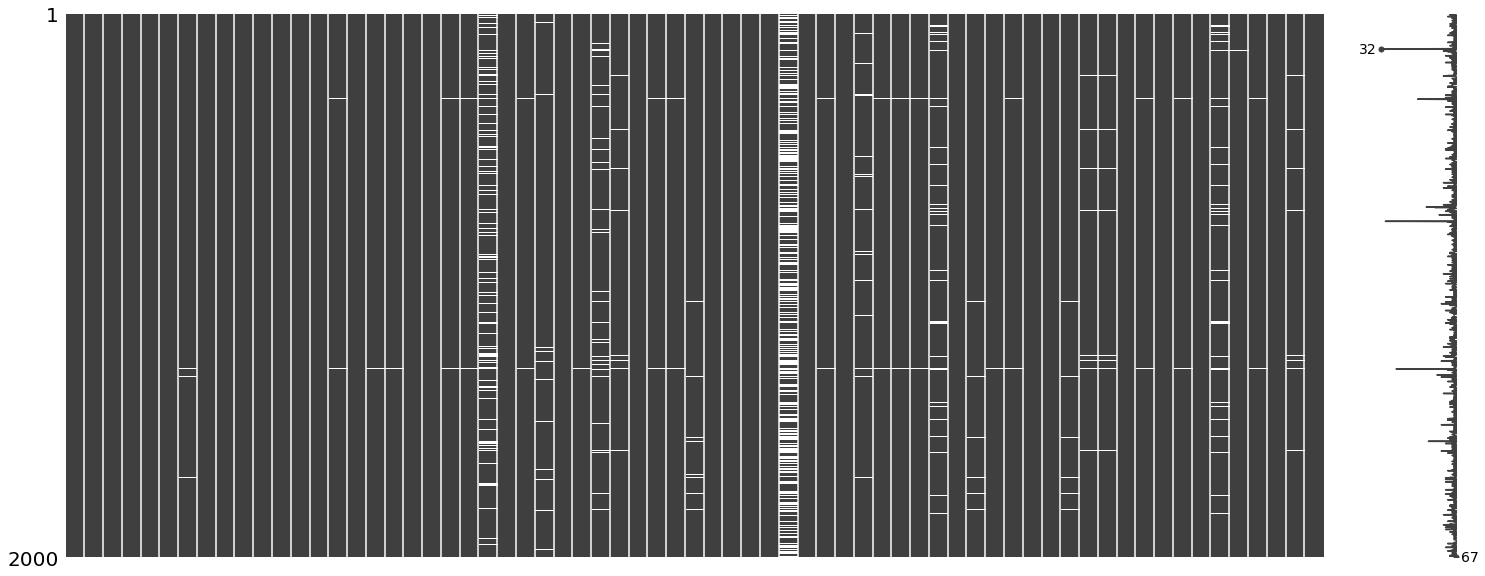

In [24]:
msno.matrix(df_que)

In [26]:
df_que.describe()

,id,forecasting period,net_profit_over_total_assets,total_liabilities_over_total_assets,working_capital_over_total_assets,current_assets_over_short_term_liabilities,cash_plus_short_term_securities_plus_receivables_minus_short_term_liabilities_over_operating_expenses_minus_depreciation_times_365,retained_earnings_over_total_assets,EBIT_over_total_assets,book_value_of_equity_over_total_liabilities,...,sales_minus_cost_of_products_sold_over_sales,current_assets_minus_inventory_minus_short_term_liabilities_over_sales_minus_gross_profit_minus_depreciation,total_costs_overtotal_sales,long_term_liabilities_over_equity,sales_over_inventory,sales_over_receivables,short_term_liabilities_times_365_over_sales,sales_over_short_term_liabilities,sales_over_fixed_assets,class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1996.000000,1995.000000,2000.000000,2000.000000,1996.000000,...,1996.000000,2000.000000,1996.000000,2000.000000,1902.000000,1997.000000,1996.000000,1996.000000,1968.000000,2000.00000
mean,999.500000,2.607500,0.076360,0.539411,0.171769,3.370192,-87.139178,-0.068772,0.100197,3.670790,...,-4.208297,-0.321507,5.206202,0.318891,62.110962,15.614555,294.551269,8.794499,48.923459,0.04800
std,577.494589,1.059247,0.416668,0.765529,0.685913,10.096452,3061.082995,2.961442,0.601112,19.568795,...,191.032548,21.942425,191.059627,2.915534,674.536864,86.318741,5159.967503,19.354380,938.031439,0.21382
min,0.000000,1.000000,-3.085797,0.000002,-21.234009,0.001470,-59529.052774,-117.420003,-3.085792,-0.956945,...,-8534.599415,-979.250019,-0.002635,-30.804864,0.006723,-12.655400,0.124092,-0.000077,-0.004120,0.00000
25%,499.750000,2.000000,0.004006,0.267433,0.011582,1.027214,-50.151159,-0.000010,0.006330,0.434380,...,0.010340,0.016175,0.871971,0.000010,5.676136,4.379090,42.234543,3.095181,2.288874,0.00000
50%,999.500000,3.000000,0.048623,0.466782,0.193121,1.549197,-1.106411,0.000002,0.058750,1.093639,...,0.054918,0.122644,0.948262,0.007295,9.769594,6.655739,72.435309,5.027666,4.432132,0.00000
75%,1499.250000,4.000000,0.134064,0.688515,0.404915,2.791886,55.834448,0.064306,0.156700,2.634340,...,0.132621,0.293799,0.992264,0.218273,21.387130,10.475963,117.959370,8.633024,9.702419,0.00000
max,1999.000000,4.000000,15.496998,21.260993,0.999996,192.830454,65359.979604,36.739994,18.912999,702.950146,...,1.011539,24.353987,8536.807219,88.658847,26865.051546,2939.398791,190570.077702,447.620136,40169.998303,1.00000


In [31]:
correlation=df_que.corr()
correlation=correlation.round(4)
correlation.to_csv('corel.csv')
files.download('corel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
df_que.isna().sum().sort_values(ascending=False)

current_assets_minus_inventories_over_long_term_liabilities    879
sales_n_over_sales_n_minus_1                                   278
profit_on_operating_activities_over_financial_expenses         133
net_profit_over_inventory                                       98
sales_over_inventory                                            98
                                                              ... 
equity_minus_share_capital_over_total_assets                     0
logarithm_of_total_assets                                        0
forecasting period                                               0
profit_on_sales_over_total_assets                                0
class                                                            0
Length: 67, dtype: int64

In [51]:
#Impute

imp_df=df_que


In [53]:
imputer = SimpleImputer(strategy='mean', 
                        missing_values=np.nan)
imputer = imputer.fit(imp_df)
imp_df.iloc[:,:] = imputer.transform(imp_df)
imp_df

,id,forecasting period,net_profit_over_total_assets,total_liabilities_over_total_assets,working_capital_over_total_assets,current_assets_over_short_term_liabilities,cash_plus_short_term_securities_plus_receivables_minus_short_term_liabilities_over_operating_expenses_minus_depreciation_times_365,retained_earnings_over_total_assets,EBIT_over_total_assets,book_value_of_equity_over_total_liabilities,...,sales_minus_cost_of_products_sold_over_sales,current_assets_minus_inventory_minus_short_term_liabilities_over_sales_minus_gross_profit_minus_depreciation,total_costs_overtotal_sales,long_term_liabilities_over_equity,sales_over_inventory,sales_over_receivables,short_term_liabilities_times_365_over_sales,sales_over_short_term_liabilities,sales_over_fixed_assets,class
0,0.0,4.0,0.141939,0.450292,0.021422,1.052987,-28.529084,1.419335e-01,0.172629,0.990337,...,0.079572,0.318286,0.927687,0.106818,12.941797,10.044585,64.713700,5.626894,3.937064,1.0
1,1.0,4.0,0.147560,0.234840,0.708335,4.016018,119.445611,4.570896e-01,0.186070,3.206445,...,0.095218,0.195943,0.907056,-0.000029,233.301688,2.747416,36.967435,9.813419,40.567739,0.0
2,2.0,1.0,-0.024542,0.311544,0.067831,1.255247,-15.019923,-6.570028e-01,-0.024537,2.209000,...,0.109035,-0.035634,0.929825,0.055331,8.589991,5.164738,117.924040,3.098273,1.239711,0.0
3,3.0,2.0,0.159317,0.777017,0.207431,1.267310,-4.892918,-5.191930e-06,0.159321,0.288177,...,0.102971,0.714528,0.937895,-0.000077,9.928221,5.912786,123.752610,2.946008,130.208321,0.0
4,4.0,4.0,0.004404,0.577419,-0.104435,0.786225,-116.911618,5.656095e-02,0.004249,0.692166,...,0.016446,0.011019,0.979425,0.221335,5.099541,6.890130,166.761980,2.189705,1.740353,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995.0,2.0,-0.137211,0.611483,-0.026157,0.944597,-77.907440,-1.975521e-01,-0.151455,0.295304,...,-0.085465,-0.759126,1.080078,0.751035,5.124097,4.997703,160.099624,2.280574,1.974315,0.0
1996,1996.0,2.0,-0.191808,0.479791,0.299542,2.789572,38.101545,-1.123505e-07,-0.191809,1.085087,...,-0.084903,-0.368699,1.075628,0.000078,67.877834,16.174054,26.327039,13.859051,4.348128,0.0
1997,1997.0,3.0,0.093905,0.671077,0.108915,1.167943,0.813525,-2.940531e-03,0.117719,0.490773,...,0.023152,0.285505,0.964956,0.072562,41.945589,5.440809,71.942458,5.073789,13.448347,0.0
1998,1998.0,2.0,-0.208583,0.173648,0.433297,3.544830,47.438724,1.011807e-05,-0.217610,4.759676,...,-0.249477,-0.252407,1.235273,-0.000208,4.219153,7.695677,72.751695,5.014590,2.150047,0.0


In [54]:
imp_df.isna().sum().sort_values(ascending=False)

id                                                                     0
EBITDA_profit_on_operating_activities_minus_depreciation_over_sales    0
profit_on_sales_over_total_assets                                      0
total_sales_over_total_assets                                          0
current_assets_minus_inventories_over_long_term_liabilities            0
                                                                      ..
profit_on_operating_activities_over_financial_expenses                 0
working_capital_over_fixed_assets                                      0
logarithm_of_total_assets                                              0
total_liabilities_minus_cash_over_sales                                0
class                                                                  0
Length: 67, dtype: int64

In [55]:
X = imp_df.drop(['class'],axis=1).values
y = imp_df['class'].values

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(random_state=0, solver='liblinear')

In [59]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9560
